## KMeans-Clustering

In [55]:
import pandas as pd
from scipy.cluster import vq
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist, pdist
%matplotlib inline

In [4]:
df = pd.read_csv('/Users/amybrown/Thinkful/Unit_4/Lesson_3/curric-data-001-data-sets/un/un.csv')
# there are 207 rows in the dataset

In [5]:
# determine number of non-null values in each column
nonnull = df.count()

In [6]:
# get data types for each column
for col in df:
    print(col, df[col].dtypes)

country object
region object
tfr float64
contraception float64
educationMale float64
educationFemale float64
lifeMale float64
lifeFemale float64
infantMortality float64
GDPperCapita float64
economicActivityMale float64
economicActivityFemale float64
illiteracyMale float64
illiteracyFemale float64


In [7]:
final_df = df[['lifeMale', 'lifeFemale', 'infantMortality', 'GDPperCapita']]

In [19]:
# store feature data in arrays
f1 = final_df['lifeMale'].values
f2 = final_df['lifeFemale'].values
f3 = final_df['infantMortality'].values
gdp = final_df['GDPperCapita'].values

In [26]:
X = np.matrix(zip(f1,f2,f3, gdp))  
X = np.vstack([f1, f2, f3, gdp])

In [30]:
np.isnan(X).any()

True

In [31]:
np.isinf(X).any()

False

In [32]:
X = np.nan_to_num(X)
X = X.reshape(207, 4)

In [37]:
K = range(1,11)
KM = [KMeans(n_clusters=k).fit(X) for k in K]
centroids = [k.cluster_centers_ for k in KM]

In [40]:
D_k = [cdist(X, cent, 'euclidean') for cent in centroids]
cIdx = [np.argmin(D,axis=1) for D in D_k]
dist = [np.min(D,axis=1) for D in D_k]
avgwithinSS = [sum(d)/X.shape[0] for d in dist]

In [41]:
# Total with-in sum of square
wcss = [sum(d**2) for d in dist]
tss = sum(pdist(X)**2)/X.shape[0]
bss = tss-wcss

In [50]:
kIdx = 10-8

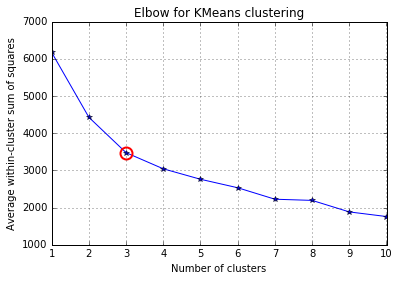

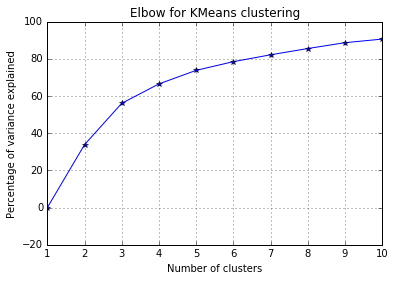

In [51]:
# elbow curve
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(K, avgwithinSS, 'b*-')
ax.plot(K[kIdx], avgwithinSS[kIdx], marker='o', markersize=12, 
markeredgewidth=2, markeredgecolor='r', markerfacecolor='None')
plt.grid(True)
plt.xlabel('Number of clusters')
plt.ylabel('Average within-cluster sum of squares')
plt.title('Elbow for KMeans clustering')

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(K, bss/tss*100, 'b*-')
plt.grid(True)
plt.xlabel('Number of clusters')
plt.ylabel('Percentage of variance explained')
plt.title('Elbow for KMeans clustering')

In [57]:
# now, cluster!
# calculate centroids of each cluster
# and the variance of all the clusters
centroids, variance = vq.kmeans(X, 3)

In [58]:
centroids

array([[   148.7952381 ,    112.96904762,    172.87678571,    135.05178571],
       [  6701.71428571,   3694.42857143,   1403.80952381,   5684.28571429],
       [  9776.33333333,  14082.38888889,  12960.83333333,   7921.66666667]])

In [59]:
variance

3284.9596197361061

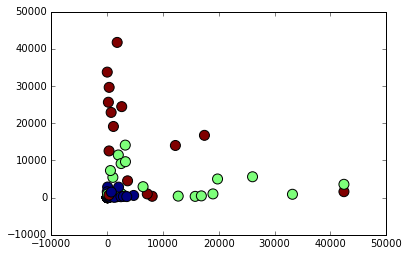

In [61]:
# seperate into clusters
identified, distance = vq.vq(X, centroids)

cluster_1 = X[identified == 0]
cluster_2 = X[identified == 1]
cluster_3 = X[identified == 2]

plt.scatter(X[:,0], X[:,1], s=100, c=identified)